In [2]:
#I made the workflow in a little notebook so the parameters are all here and its traceable.
#If you want to play around with it, it'll prob take some time since getting everything installed
#and working is a pain



In [12]:

import csb
import pandas as pd 
from Bio import SeqIO
from colour import Color

selectvals = pd.read_csv( 'BEB_HOG25968' , sep = '\t')
selectvals = list( selectvals.prob)

#build values for each residue in each sequences from aln

fasta = SeqIO.parse('HOG25968.1.aln' , 'fasta')
selection_sequences = { seq.id:{ i:{ 'res':r , 'val':selectvals[i]} for i,r in enumerate(str(seq.seq)) if r != '-' } for seq in fasta }
print(selection_sequences.keys())




dict_keys(['snap_masked-jcf7180000221780-processed-gene-0.1-mRNA-1', 'maker-jcf7180000227595-augustus-gene-0.2-mRNA-1', 'maker-jcf7180000221555-augustus-gene-0.12-mRNA-1', 'maker-jcf7180000221555-augustus-gene-0.13-mRNA-1', 'maker-jcf7180000271963-snap-gene-0.0-mRNA-1', 'snap_masked-jcf7180000239893-processed-gene-0.3-mRNA-1', 'maker-jcf7180000252727-augustus-gene-0.1-mRNA-1', 'maker-jcf7180000248133-augustus-gene-0.3-mRNA-1', 'maker-jcf7180000234763-augustus-gene-0.2-mRNA-1', 'maker-jcf7180000269074-snap-gene-0.3-mRNA-1', 'maker-jcf7180000227141-augustus-gene-0.10-mRNA-1', 'maker-jcf7180000226570-augustus-gene-0.4-mRNA-1', 'maker-jcf7180000235843-augustus-gene-0.0-mRNA-1', 'maker-jcf7180000251249-augustus-gene-0.3-mRNA-1', 'maker-jcf7180000261585-snap-gene-0.2-mRNA-1', 'maker-agouti_scaf_22-augustus-gene-0.28-mRNA-1', 'maker-jcf7180000249370-snap-gene-0.0-mRNA-1', 'maker-jcf7180000237756-augustus-gene-0.1-mRNA-1', 'maker-jcf7180000242912-augustus-gene-0.0-mRNA-1', 'maker-jcf7180000231

In [13]:
gene_name = 'maker-jcf7180000251249-augustus-gene-0.3-mRNA-1'
print(selection_sequences[gene_name])
sub_evoldf = pd.DataFrame.from_dict( selection_sequences[gene_name], orient= 'index' )

red = Color("red")
blue = Color("blue")

colorscale = list(red.range_to(blue, 100))

sub_evoldf['colorscale'] = sub_evoldf.val.map( lambda x : colorscale[int( x *100 )].rgb)

sub_evoldf['rgb'] = sub_evoldf.colorscale.map( lambda x : '0x'+''.join([ '{:2.2f}'.format(round(min(val ,.99), 2 ) ).replace('.','')[1:]  for val in x ]) ) 
print(sub_evoldf.head())

sub_evoldf.to_csv('evolcolors.csv')


{362: {'res': 'M', 'val': 0.0033}, 363: {'res': 'G', 'val': 0.0040100000000000005}, 364: {'res': 'V', 'val': 0.033}, 365: {'res': 'K', 'val': 0.5373}, 366: {'res': 'G', 'val': 0.00632}, 367: {'res': 'L', 'val': 0.00782}, 368: {'res': 'S', 'val': 0.011940000000000001}, 369: {'res': 'T', 'val': 0.008459999999999999}, 370: {'res': 'Y', 'val': 0.007909999999999999}, 371: {'res': 'L', 'val': 0.12353}, 372: {'res': 'Q', 'val': 0.03291}, 373: {'res': 'Q', 'val': 0.010879999999999999}, 374: {'res': 'D', 'val': 0.00704}, 375: {'res': 'P', 'val': 0.00915}, 376: {'res': 'N', 'val': 0.067}, 377: {'res': 'N', 'val': 0.00485}, 378: {'res': 'F', 'val': 0.00583}, 379: {'res': 'S', 'val': 0.01273}, 380: {'res': 'S', 'val': 0.04057}, 381: {'res': 'F', 'val': 0.006640000000000001}, 382: {'res': 'E', 'val': 0.00503}, 383: {'res': 'L', 'val': 0.01065}, 384: {'res': 'H', 'val': 0.00628}, 385: {'res': 'N', 'val': 0.0054}, 386: {'res': 'T', 'val': 0.007259999999999999}, 387: {'res': 'R', 'val': 0.047580000000

In [ ]:
####begin modelling here ######



In [3]:
import subprocess
import shlex

def runHHblits( aln , name, path , outdir, db , iterations , ncores , runName='' , SS= False  , ohhm = False , verbose = True , Z = 2000 , B = 2000 , xargs = ' -cons '):
    if verbose == True:
        print( [aln , name, path , outdir, db , iterations , ncores , runName] )
    
    outhhr= outdir+name+runName+".hhr"
    args = path + ' -cpu '+ str(ncores) +' -d ' + db + ' -i ' + aln  +' -o '+ outhhr + ' -n ' + str(iterations) + ' -B '+ str(B) + ' -Z ' + str(Z) +' '+ xargs 
    if SS == True:
         args += ' -ssm 2 -ssw .5 '
    
    if ohhm == True:
        outa3m = outdir+name+runName+'.a3m'
        args += ' -Oa3m ' + outa3m
    else: 
        outa3m = None
    if verbose == True:
        print(args)
    
    args = shlex.split( args)
    p = subprocess.run( args )
    return p , [outhhr,outa3m]

In [4]:
#run hhblits
p, outfiles = runHHblits( './hogalnclip.aln.fasta' , 'HOG25968' , 'hhblits', outdir = './' , db ='/home/cactuskid13/mntpt/HHBLITsdb/pdb70/pdb70' , ohhm = True,  iterations = 1 , ncores = 8 , )
print(outfiles)

['./hogalnclip.aln.fasta', 'HOG25968', 'hhblits', './', '/home/cactuskid13/mntpt/HHBLITsdb/pdb70/pdb70', 1, 8, '']
hhblits -cpu 8 -d /home/cactuskid13/mntpt/HHBLITsdb/pdb70/pdb70 -i ./hogalnclip.aln.fasta -o ./HOG25968.hhr -n 1 -B 2000 -Z 2000  -cons  -Oa3m ./HOG25968.a3m
['./HOG25968.hhr', './HOG25968.a3m']


In [5]:
#parse results
from csb.bio.io.hhpred import HHOutputParser
results = HHOutputParser(alignments=False).parse_file('./HOG25968.hhr')

newhits = {}
hitlist=[]
for hit in results:
    hitlist.append(hit.id)
    newhits.update( {  hit.id : { 'prob':hit.probability, 'len' : hit.length , 'score': hit.score   , 'start':hit.start , 'stop':hit.end }}  )
      
hhdf = pd.DataFrame.from_dict(newhits, orient = 'index')
hhdf['model'] = hhdf.index.map(lambda x : x.split('_')[0])
hhdf['chain'] = hhdf.index.map(lambda x : x.split('_')[1])

print(hhdf.head())



         prob  len  score  start  stop model chain
1A77_A  0.995  182  174.3      1   182  1A77     A
1B43_B  0.997  181  188.3      1   181  1B43     B
1BGX_T  0.988  146  143.7      5   150  1BGX     T
1CMW_A  0.989  143  148.4      8   150  1CMW     A
1O4W_A  0.335   30   33.1     95   124  1O4W     A


928


Text(0, 0.5, 'n templates above 90% proba')

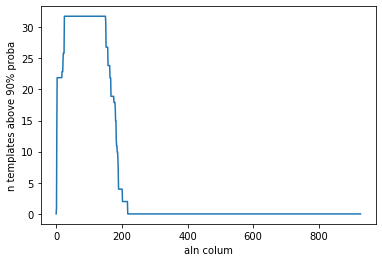

In [7]:
import numpy as np

from matplotlib import pyplot as plt

print(results.match_columns)
matches=np.zeros((results.match_columns,1))
for hit in results:
    if hit.probability>.9:
        matches[ hit.qstart :hit.qstart+hit.length ] += hit.probability

plt.plot(matches)
plt.xlabel('aln colum')
plt.ylabel('n templates above 90% proba')


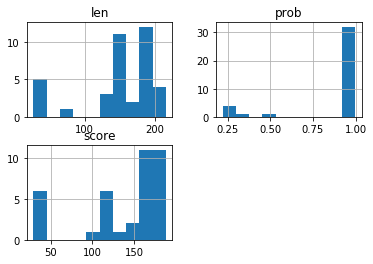

structure subset


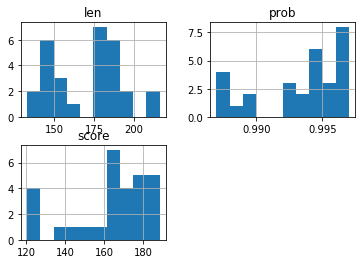

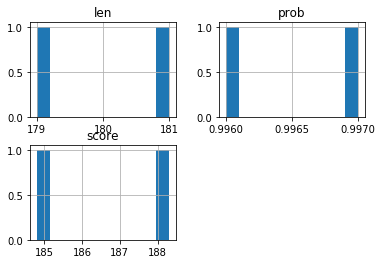

         prob  len  score  start  stop model chain
1A77_A  0.995  182  174.3      1   182  1A77     A
1B43_B  0.997  181  188.3      1   181  1B43     B
1BGX_T  0.988  146  143.7      5   150  1BGX     T
1CMW_A  0.989  143  148.4      8   150  1CMW     A
1RXV_B  0.996  181  180.3      1   181  1RXV     B
1RXW_A  0.996  181  181.3      1   181  1RXW     A
1UL1_X  0.995  187  178.1      1   187  1UL1     X
1UL1_Z  0.994  187  169.8      1   187  1UL1     Z
2IZO_A  0.989  165  134.4     14   178  2IZO     A
3ORY_A  0.996  187  183.2     10   196  3ORY     A
3Q8L_A  0.995  186  172.2      1   186  3Q8L     A
3QE9_Y  0.996  179  184.8      1   179  3QE9     Y
3ZD9_A  0.987  133  120.5      3   135  3ZD9     A
3ZDB_A  0.987  133  120.5      3   135  3ZDB     A
4Q0W_B  0.994  199  164.1      1   199  4Q0W     B
4Q0Z_A  0.994  199  164.5      1   199  4Q0Z     A
4WA8_A  0.994  178  160.1      8   185  4WA8     A
5CNQ_A  0.993  148  164.2      1   148  5CNQ     A
5CO8_C  0.993  149  167.3      

In [48]:
#select best candidates

hhdf[['len' , 'prob' , 'score']].hist()
plt.show()

topk = 2

print('structure subset')
sub = hhdf[hhdf.prob> .9]
sub = sub[sub.len > 100 ]
sub = sub[sub.score > 120 ]

sub[['len' , 'prob' , 'score']].hist()
plt.show()


topsub = sub.sort_values(by = 'score' , ascending = False).iloc[0:topk]


topsub[['len' , 'prob' , 'score']].hist()
plt.show()

chains= dict( zip ( topsub.model, topsub.chain ))
print(sub)
print(topsub)

In [11]:
#now we have some long high quality hits to some chains
#get templates
import wget
import glob

dl_url = 'http://files.rcsb.org/download/'
structs = {}
already = glob.glob( './templates/*.pdb' )
for m in topsub.model.unique():
    print(m)
    structfile = './templates/'+m.upper()+'.pdb'
    structs[m]= structfile
    if structfile not in already:
        wget.download(url = dl_url + m +'.pdb' , out =structfile)

1B43
5V07


In [12]:
from Bio.PDB import *
#find ca string for each strucutre
#make sure you grab the right chain
from Bio import Alphabet
parser = PDBParser()
from Bio.SeqUtils import seq1
letter3 = Alphabet.ThreeLetterProtein.letters
converter = { l.upper(): seq1(l) for l in letter3} 
print(converter)

{'ALA': 'A', 'ASX': 'B', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER': 'S', 'THR': 'T', 'SEC': 'U', 'VAL': 'V', 'TRP': 'W', 'XAA': 'X', 'TYR': 'Y', 'GLX': 'Z'}


In [13]:
models = {}
ali_input = {}
builder = Polypeptide.PPBuilder()
#slice structures in hhr

io=PDBIO()
sliceprots = False


class resselect(Select):
    def __init__(self, reslist):
        self.reslist=reslist
    
    def accept_residue(self ,residue ):
        if residue in self.reslist:
            return 1
        else:
            return 0

for idx,row in topsub.iterrows():
    code = row.model
    if code in structs:
        print(code)
        structure = parser.get_structure(code,structs[code])
        io.set_structure(structure)
        
        for chain in structure.get_chains():
            if chain.id == row.chain:
                #trim the structures to hhblits detected regions
                if sliceprots == True:
                    #Dice.extract(structure=structure , chain_id=chain.id , start=row.start-1, end=row.stop , filename='./modellercif/'+row.model+'.pdb' )
                    #sub_structure = parser.get_structure(code , './modellercif/'+row.model+'.pdb' )
                    #subchains = [ c for c in structure.get_chains()]
                    peptides  = [p for p in  builder.build_peptides(chain)]
                    peptidelen  = [len(p) for p in  builder.build_peptides(chain)]
                    print(peptidelen)
                    
                else:
                    #Dice.extract(structure=structure , chain_id=chain.id , start=0, end=len(chain), filename='./modellercif/'+row.model+'.pdb' )
                    
                    #sub_structure = parser.get_structure(code , './modellercif/'+row.model+'.pdb' )
                    #sub_structure = structure
                    peptides  = [p for p in  builder.build_peptides(chain)]
                    peptidelen  = [len(p) for p in  builder.build_peptides(chain)]
                    print(peptidelen)
                    #pp = peptides[0]
                
                for i,pp in enumerate( peptides):
                    #break all subchains into files
                    if peptidelen[i] > 75:
                        io.save('./modellercif/'+row.model+'_'+str(i) +'.pdb', resselect(pp))
                        seq = str(pp.get_sequence())
                        print(seq)
                        models[row.model+'_'+str(i)]={'mdl': './modellercif/'+row.model+'_'+str(i) +'.pdb' , 'chain':chain.id }
                    #ali_input[row.model] = { 'chain': subchains[0].id , 'seq': seq , 'start':'' , 'stop':''  } 
                #mdl = model(env, file='./modellercif/'+row.model+'.pdb', model_segment=('FIRST:'+chain.id, 'LAST:'+chain.id))
                #chains = mdl.make_chains(file='./modellercif/'+row.model+'.pdb')
                    
                #for i,pp in enumerate(peptides):
                #    if i > 0:
                #        seq+='-'
                #    seq += str(pp.get_sequence())
                #ali_input[row.model] = { 'chain': subchains[0].id , 'seq': seq , 'start':'' , 'stop':''  }     
                
                # grab all sequences from the query input

from Bio import SeqIO
for seq in SeqIO.parse('HOG25968.fa' , 'fasta'):
    ali_input[seq.id] = { 'chain': '', 'seq': str(seq.seq) , 'start':1 , 'stop':len(seq.seq)  } 
alidf = pd.DataFrame.from_dict( ali_input , orient = 'index')
print(alidf.head())

1B43
[339]


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5912.
  PDBConstructionWarning)
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6155.
  PDBConstructionWarning)


GVPIGEIIPRKEIELENLYGKKIAIDALNAIYQFLSTIRQKDGTPLMDSKGRITSHLSGLFYRTINLMEAGIKPVYVFDGEPPEFKKKELEKRREAREEAEEKWREALEKGEIEEARKYAQRATRVNEMLIEDAKKLLELMGIPIVQAPSEGEAQAAYMAAKGSVYASASQDYDSLLFGAPRLVRNLTITGKRKLPGKNVYVEIKPELIILEEVLKELKLTREKLIELAILVGTDYNPGGIKGIGLKKALEIVRHSKDPLAKFQKQSDVDLYAIKEFFLNPPVTDNYNLVWRDPDEEGILKFLCDEHDFSEERVKNGLERLKKAIKSGKQSTLESWFKR
5V07
[344]
GIQGLLQFIKEASEPIHVRKYKGQVVAVDTYCWLHKGAIACAEKLAKGEPTDRYVGFCMKFVNMLLSHGIKPILVFDGCTLPSKKEVERSRRERRQANLLKGKQLLREGKVSEARECFTRSINITHAMAHKVIKAARSQGVDCLVAPYEADAQLAYLNKAGIVQAIITEDSALLAFGCKKVILKMDQFGNGLEIDQARLGMCRQLGDVFTEEKFRYMCILSGCDYLSSLRGIGLAKACKVLRLANNPDIVKVIKKIGHYLKMNITVPEDYINGFIRANNTFLYQLVFDPIKRKLIPLNAYEDDVDPETLSYAGQYVDDSIALQIALGNKDINTFEQIDDYNPDT
           chain                                                seq  start  \
CCD75246.1        MGIRGLWTYIQSNSENFSPYELHNQPLVIDAENFASLCYRQATLRC...      1   
CCD81830.1        MLPLFAILVGNDMISNIRLPTVIDSLMCTSVLQSRSHYQRRIDAIF...      1   
CCD81832.1        MGIRGLWTYIQSNSDNLSRYELHNQPLVIDAENFAAFCYRRAAFRC...   

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 7266.
  PDBConstructionWarning)
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7269.
  PDBConstructionWarning)
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 7271.
  PDBConstructionWarning)
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7373.
  PDBConstructionWarning)
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7390.
  PDBC

In [14]:
from modeller import *
import modeller.salign
log.none()
env = environ()
env.io.atom_files_directory = ['./modellercif/']

#aln = alignment(env, file='align2d_in.ali', align_codes='all' )
aln = alignment(env)
knowns = []
for m in models:
    mdl = model(env, file=m, model_segment=('FIRST:'+models[m]['chain'], 'LAST:'+models[m]['chain']))
    aln.append_model(mdl, atom_files=m, align_codes= m)
    knowns.append(m)
print(aln)

for (weights, write_fit, whole) in (((1., 0., 0., 0., 1., 0.), False, True),
                            ((1., 0.5, 1., 1., 1., 0.), False, True),
                            ((1., 1., 1., 1., 1., 0.), True, False)):
    aln.salign(rms_cutoff=3.5, normalize_pp_scores=False,
       rr_file='$(LIB)/as1.sim.mat', overhang=30,
       gap_penalties_1d=(-450, -50),
       gap_penalties_3d=(0, 3), gap_gap_score=0, gap_residue_score=0,
       dendrogram_file='1is3A.tree',
       alignment_type='tree',
       feature_weights=weights, # For a multiple sequence alignment only
       improve_alignment=True, fit=True, write_fit=write_fit,
       write_whole_pdb=whole, output='ALIGNMENT QUALITY')

aln.write(file='1is3A-it.pap', alignment_format='PAP')
aln.write(file='1is3A-it.ali', alignment_format='PIR')

print('DONE')

<Alignment of <Structure '1B43_0'>, <Structure '5V07_0'>>
DONE


In [15]:
blockct = 0
print('making sequence pir')
with open( 'align2d_in.ali' , 'w') as alnout:
    for idx,row in alidf.iterrows():
        print(row)
        if len(row.chain ) > 0:
            pass
        #    line2 = 'structureX:'+idx+':'+str(row.start)+' :'+row.chain + ':' + str( row.stop  )  + ':::::'+'\n'
        else:
            blockct+=1
            print(idx)
            line1 = '>P1;'+idx +'\n'
            line2 = 'sequence:'+idx+':1 : :'+str( len(row.seq) )  + ':::::' +'\n' 
            line3 = row.seq +'*\n'
            #print(  line1 + line2 + line3)
            alnout.write( line1 + line2 + line3)
            
print('aln struct block to seq block ')   
#structure sensitive aln
aln = alignment(env, file='align2d_in.ali', align_codes='all' )
aln.append(file='1is3A-it.ali', align_codes='all')
aln.salign(
               align_block= blockct,
               gap_penalties_1d=(-100, 0),
               gap_penalties_2d=(3.5, 3.5, 3.5, 0.2, 4.0, 6.5, 2.0, 0.0, 0.0),
            fit = True
               # d.p. score matrix
               #output_weights_file='salign.mtx'
               )
aln.write(file='align2d.pap', alignment_format='PAP',
          alignment_features='INDICES HELIX BETA STRAIGHTNESS ' + \
                             'ACCESSIBILITY CONSERVATION')

#output aln
aln.write(file='align2d_all.ali', alignment_format='PIR')
print('DONE')

making sequence pir
chain                                                     
seq      MGIRGLWTYIQSNSENFSPYELHNQPLVIDAENFASLCYRQATLRC...
start                                                    1
stop                                                   725
Name: CCD75246.1, dtype: object
CCD75246.1
chain                                                     
seq      MLPLFAILVGNDMISNIRLPTVIDSLMCTSVLQSRSHYQRRIDAIF...
start                                                    1
stop                                                   492
Name: CCD81830.1, dtype: object
CCD81830.1
chain                                                     
seq      MGIRGLWTYIQSNSDNLSRYELHNQPLVIDAENFAAFCYRRAAFRC...
start                                                    1
stop                                                   722
Name: CCD81832.1, dtype: object
CCD81832.1
chain                                                     
seq      MVFKITERAMRHCGVNVKEMGIRGLWTYIESSGGNLSVYELHNQPL...
start                    

In [16]:
#run modeller
print(models)

# Comparative modeling by the automodel class
from modeller import *              # Load standard Modeller classes
from modeller.automodel import *    # Load the automodel class
print(knowns)
env = environ() 
env.io.atom_files_directory = ['./modellercif/']
for seq in alidf.index:
    a = automodel(env,
                  alnfile  = 'align2d_all.ali',     # alignment filename
                  knowns   =  knowns ,              # codes of the templates
                  sequence =  seq)              # code of the target
    a.starting_model= 1                 # index of the first model
    a.ending_model  = 1                 # index of the last model
    a.repeat_optimization = 5
    a.make()                            # do the actual comparative modeling
    
print('DONE')

{'1B43_0': {'mdl': './modellercif/1B43_0.pdb', 'chain': 'B'}, '5V07_0': {'mdl': './modellercif/5V07_0.pdb', 'chain': 'Z'}}
['1B43_0', '5V07_0']
The following 3 residues contain 6-membered rings with poor geometries
after transfer from templates. Rebuilding rings from internal coordinates:
   <Residue 34 (type PHE)>
   <Residue 161 (type TYR)>
   <Residue 398 (type PHE)>
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
CCD75246.1.B99990001.pdb     59530.73828

The following 1 residues contain 6-membered rings with poor geometries
after transfer from templates. Rebuilding rings from internal coordinates:
   <Residue 162 (type PHE)>
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms


In [50]:
#run modeller
print(models)

# Comparative modeling by the automodel class
from modeller import *              # Load standard Modeller classes
from modeller.automodel import *    # Load the automodel class
print(knowns)
env = environ() 
env.io.atom_files_directory = ['./modellercif/']
for seq in alidf.index:
    a = automodel(env,
                  alnfile  = 'align2d_all.ali',     # alignment filename
                  knowns   =  [knowns[0]] ,              # codes of the templates
                  sequence =  seq)              # code of the target
    a.starting_model= 1                 # index of the first model
    a.ending_model  = 1                 # index of the last model
    a.repeat_optimization = 2
    a.make()                            # do the actual comparative modeling
    
print('DONE')

{'1B43_0': {'mdl': './modellercif/1B43_0.pdb', 'chain': 'B'}, '5V07_0': {'mdl': './modellercif/5V07_0.pdb', 'chain': 'Z'}}
['1B43_0']
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
CCD75246.1.B99990001.pdb      5212.64307

0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
CCD81830.1.B99990001.pdb      2692.53442

0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstrom

<Alignment of <Structure '1B43_0'>, <Structure '5V07_0'>>
DONE
